In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def create_eval_correct_pairs(basic_llm_data, llm_kg_data):
    pairs = []
    current_idx = 0

    for i in range(len(basic_llm_data) - 3):
        question = basic_llm_data[str(i)]["question"]
        while question != llm_kg_data[str(current_idx)]["question"]:
            current_idx += 1
        if "evaluation_score" in llm_kg_data[str(current_idx)]:
            if basic_llm_data[str(i)]["llm_is_correct"]:
                pairs.append((llm_kg_data[str(current_idx)]["evaluation_score"], 1))
            else:
                pairs.append((llm_kg_data[str(current_idx)]["evaluation_score"], 0))
                
    return pairs

In [3]:
geography_file_basic = open('output/qa_sets_basic_llm_geography1695750702.298964.json')
geography_data_basic = json.load(geography_file_basic)

geography_file_kg = open('output/qa_sets_llm_kg_geography_wd_1695220184.822093.json')
geography_data_kg = json.load(geography_file_kg)

geo_pairs = create_eval_correct_pairs(geography_data_basic, geography_data_kg)

geo_pairs_array = np.array(geo_pairs)

geo_y = geo_pairs_array[:, 0]
geo_x = geo_pairs_array[:, 1]

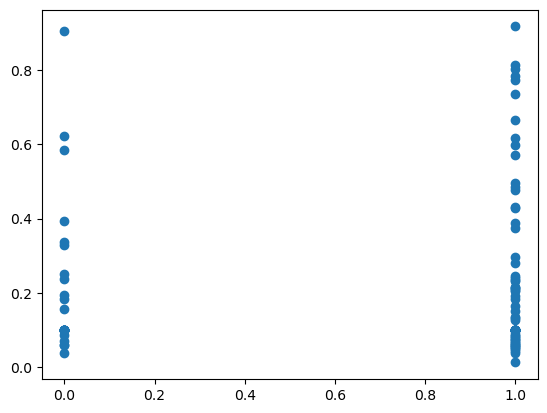

In [4]:
plt.scatter(geo_x, geo_y)
plt.show()

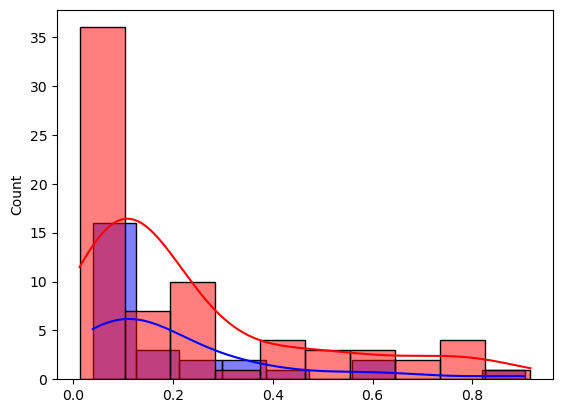

In [5]:
geo_true_opts = geo_pairs_array[geo_pairs_array[:, 1] == 0][:, 0]
geo_false_opts = geo_pairs_array[geo_pairs_array[:, 1] == 1][:, 0]

sns.histplot(geo_true_opts, color='b', kde=True)
sns.histplot(geo_false_opts, color='r', kde=True)
plt.show()

In [6]:
government_file_basic = open('output/qa_sets_basic_llm_government_and_politics1695751141.861084.json')
government_data_basic = json.load(government_file_basic)

government_file_kg = open('output/qa_sets_llm_kg_government_and_politics_wd_1695220705.666582.json')
government_data_kg = json.load(government_file_kg)

gov_pairs = create_eval_correct_pairs(government_data_basic, government_data_kg)

gov_pairs_array = np.array(gov_pairs)

gov_y = gov_pairs_array[:, 0]
gov_x = gov_pairs_array[:, 1]

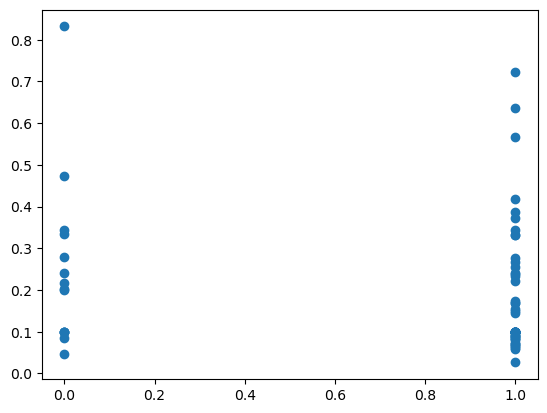

In [7]:
plt.scatter(gov_x, gov_y)
plt.show()

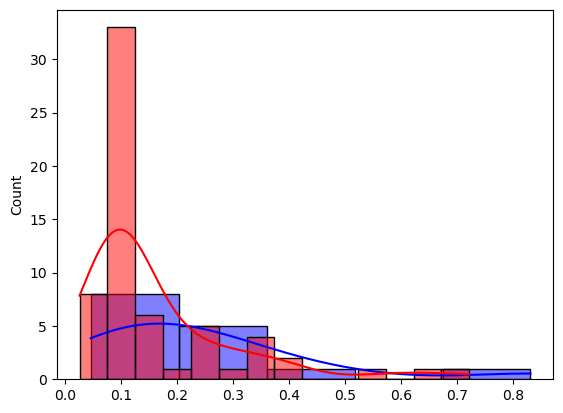

In [8]:
gov_true_opts = gov_pairs_array[gov_pairs_array[:, 1] == 0][:, 0]
gov_false_opts = gov_pairs_array[gov_pairs_array[:, 1] == 1][:, 0]

sns.histplot(gov_true_opts, color='b', kde=True)
sns.histplot(gov_false_opts, color='r', kde=True)
plt.show()